# Task 3 - Ashish Tara Shivakumar Ireddy - J41325c

In [1]:
#Importing required Libraries

import scipy
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  learning_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_recall_curve,  precision_recall_curve, auc, make_scorer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from scipy import optimize
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from random import randint

In [2]:
#importing Data
df = pd.read_csv('bioresponse.csv')
df


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Splitting Data

#a = np.array(df.iloc[:,1:1777].values)
#b = np.array(df.iloc[:,0].values)

In [4]:
#75 - 25% train-test ratio
x_train, x_test, y_train, y_test= train_test_split(df.drop(columns=['Activity']).values, df['Activity'].values, test_size=0.25 , random_state=0 )

x_train = x_train.T
x_test = x_test.T
y_train = y_train.reshape(1, y_train.shape[0])
y_test = y_test.reshape(1, y_test.shape[0])


### Sigmoid

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 

In [5]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [6]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [7]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [8]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

# Stochastic Gradient Descent (SGD)

In [9]:
#optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.005, print_cost = True)

def Sgrad(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    var = X.shape[1]
    
    costs = []
    for i in range(num_iterations):        
        rand_index = randint(0, var-1)
        grads, cost = propagate(w,b,X[:, [rand_index]],Y[:, [rand_index]])
                    
        dw = grads["dw"]
        w = w - learning_rate*dw
            
        db = grads["db"]
        b = b -learning_rate*db
        
        if i % 1 == 0:
            costs.append(cost)
    
    params = {"w": w, "b": b}
    
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs
    

In [10]:
def Sgradmodel(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):   
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Stochastic Gradient descent
    parameters, grads, costs = Sgrad(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    print("\n")

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [11]:
print("Learining Rate: 0.1")
Sgradmodel(x_train, y_train, x_test, y_test, num_iterations = 10, learning_rate = 0.1, print_cost = False)

print("Learining Rate: 0.5")
Sgradmodel(x_train, y_train, x_test, y_test, num_iterations = 10, learning_rate = 0.5, print_cost = False)

print("Learining Rate: 0.01")
Sgradmodel(x_train, y_train, x_test, y_test, num_iterations = 10, learning_rate = 0.01, print_cost = False)

print("Learining Rate: 0.05")
Sgradmodel(x_train, y_train, x_test, y_test, num_iterations = 10, learning_rate = 0.05, print_cost = False)

print("Learining Rate: 0.001")
Sgradmodel(x_train, y_train, x_test, y_test, num_iterations = 10, learning_rate = 0.001, print_cost = False)

Learining Rate: 0.1
train accuracy: 48.66690366157128 %
test accuracy: 47.44136460554371 %


Learining Rate: 0.5
train accuracy: 47.28048346960541 %
test accuracy: 46.58848614072495 %


Learining Rate: 0.01
train accuracy: 53.821542836829 %
test accuracy: 54.26439232409382 %


Learining Rate: 0.05
train accuracy: 54.28368290081763 %
test accuracy: 54.79744136460554 %


Learining Rate: 0.001
train accuracy: 45.9651617490224 %
test accuracy: 45.20255863539445 %




{'costs': [array([0.69314718]),
  array([0.71647807]),
  array([0.69305998]),
  array([0.6827506]),
  array([0.71598671]),
  array([0.6835937]),
  array([0.66958041]),
  array([0.66429781]),
  array([0.64299381]),
  array([0.75966233])],
 'Y_prediction_test': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.

In [12]:
temp1 = x_train.shape[0]
w, b = initialize_with_zeros(temp1)

params_sgd1, grads_sgd1, costs_sgd1=Sgrad(w, b, x_train, y_train, num_iterations=10, learning_rate=0.1, print_cost = False)
params_sgd2, grads_sgd2, costs_sgd2=Sgrad(w, b, x_train, y_train, num_iterations=10, learning_rate=0.5, print_cost = False)
params_sgd3, grads_sgd3, costs_sgd3=Sgrad(w, b, x_train, y_train, num_iterations=10, learning_rate=0.01, print_cost = False)
params_sgd4, grads_sgd4, costs_sgd4=Sgrad(w, b, x_train, y_train, num_iterations=10, learning_rate=0.05, print_cost = False)
params_sgd5, grads_sgd5, costs_sgd5=Sgrad(w, b, x_train, y_train, num_iterations=10, learning_rate=0.001, print_cost = False)
print("This part has finished")

This part has finished


Text(0.5, 1.0, 'Stochastic Gradient Descent Learning Curve')

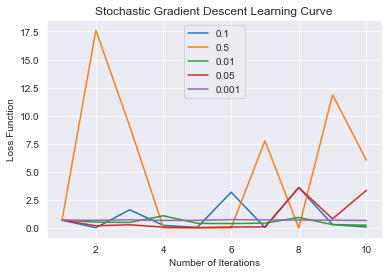

In [13]:
axis = np.arange(1,11)

plt.plot(axis, costs_sgd1)
plt.plot(axis, costs_sgd2)
plt.plot(axis, costs_sgd3)
plt.plot(axis, costs_sgd4)
plt.plot(axis, costs_sgd5)
plt.legend(("0.1", "0.5", "0.01", "0.05", "0.001"))
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Function")
plt.title("Stochastic Gradient Descent Learning Curve")

# Gradient Descent (GD)

In [14]:
#optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.005, print_cost = True)

def Ngrad(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
      
    costs = []
    #sketchy 
    for i in range(num_iterations): 
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads["dw"]
        w = w - learning_rate*dw
        db = grads["db"]
        b = b - learning_rate*db
        
        if i % 1 == 0:
            costs.append(cost)
   
    params = {"w": w, "b": b}
    
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

In [15]:
def Ngradmodel(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.1, print_cost = False):   
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Normal Gradient descent
    parameters, grads, costs = Ngrad(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    print("\n")

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [16]:
print("Learining Rate: 0.1")
Ngradmodel(x_train, y_train, x_test, y_test, num_iterations = 100, learning_rate = 0.1, print_cost = False)

print("Learining Rate: 0.5")
Ngradmodel(x_train, y_train, x_test, y_test, num_iterations = 100, learning_rate = 0.5, print_cost = False)

print("Learining Rate: 0.01")
Ngradmodel(x_train, y_train, x_test, y_test, num_iterations = 100, learning_rate = 0.01, print_cost = False)

print("Learining Rate: 0.05")
Ngradmodel(x_train, y_train, x_test, y_test, num_iterations = 100, learning_rate = 0.05, print_cost = False)

print("Learining Rate: 0.001")
Ngradmodel(x_train, y_train, x_test, y_test, num_iterations = 100, learning_rate = 0.001, print_cost = False)

Learining Rate: 0.1
train accuracy: 77.28403839317454 %
test accuracy: 73.88059701492537 %


Learining Rate: 0.5
train accuracy: 68.14788482047636 %
test accuracy: 62.79317697228145 %


Learining Rate: 0.01
train accuracy: 68.32563099893352 %
test accuracy: 65.13859275053305 %


Learining Rate: 0.05
train accuracy: 75.64877355136865 %
test accuracy: 70.78891257995735 %


Learining Rate: 0.001
train accuracy: 54.0348382509776 %
test accuracy: 54.79744136460554 %




{'costs': [array([0.69314718]),
  array([0.69287393]),
  array([0.69260623]),
  array([0.69234391]),
  array([0.69208682]),
  array([0.69183482]),
  array([0.69158776]),
  array([0.6913455]),
  array([0.69110791]),
  array([0.69087485]),
  array([0.6906462]),
  array([0.69042182]),
  array([0.69020161]),
  array([0.68998544]),
  array([0.6897732]),
  array([0.68956478]),
  array([0.68936007]),
  array([0.68915897]),
  array([0.68896137]),
  array([0.68876718]),
  array([0.6885763]),
  array([0.68838863]),
  array([0.6882041]),
  array([0.6880226]),
  array([0.68784405]),
  array([0.68766838]),
  array([0.6874955]),
  array([0.68732533]),
  array([0.6871578]),
  array([0.68699283]),
  array([0.68683035]),
  array([0.6866703]),
  array([0.6865126]),
  array([0.68635718]),
  array([0.686204]),
  array([0.68605297]),
  array([0.68590405]),
  array([0.68575718]),
  array([0.68561229]),
  array([0.68546934]),
  array([0.68532827]),
  array([0.68518902]),
  array([0.68505155]),
  array([0.684

In [17]:
temp2 = x_train.shape[0]

w, b = initialize_with_zeros(temp2)

params_ngd1, grads_ngd1, costs_ngd1=Ngrad(w, b, x_train, y_train, num_iterations=100, learning_rate=0.1, print_cost = False)
params_ngd2, grads_ngd2, costs_ngd2=Ngrad(w, b, x_train, y_train, num_iterations=100, learning_rate=0.5, print_cost = False)
params_ngd3, grads_ngd3, costs_ngd3=Ngrad(w, b, x_train, y_train, num_iterations=100, learning_rate=0.01, print_cost = False)
params_ngd4, grads_ngd4, costs_ngd4=Ngrad(w, b, x_train, y_train, num_iterations=100, learning_rate=0.05, print_cost = False)
params_ngd5, grads_ngd5, costs_ngd5=Ngrad(w, b, x_train, y_train, num_iterations=100, learning_rate=0.001, print_cost = False)

Text(0.5, 1.0, 'Normal Gradient Descend Learning Curve')

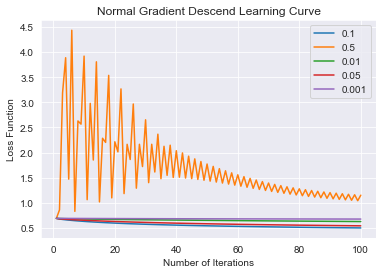

In [18]:
axis1 = np.arange(1,101)

plt.plot(axis1, costs_ngd1)
plt.plot(axis1, costs_ngd2)
plt.plot(axis1, costs_ngd3)
plt.plot(axis1, costs_ngd4)
plt.plot(axis1, costs_ngd5)
plt.legend(("0.1", "0.5", "0.01", "0.05", "0.001"))
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Function")
plt.title("Normal Gradient Descend Learning Curve")